In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spatial_profiles as prf
import models
import boundary_conditions
import plotting

%matplotlib notebook

In [2]:
ion_concentration_molar = 0.1
ion_diameter_m = 10e-10
solvent_diameter_m = 2.75e-10
x = prf.get_x_axis_nm(xmax_nm=100, n_points=1000)
bc = boundary_conditions.Dirichlet(phi_0=0.5)
xmin = -0.05
xmax = 10

## Gouy-Chapman
Gives insight, but ion concentrations are much too high.

Solved in 4 iterations, number of nodes 6056. 
Maximum relative residual: 3.51e-06 
Maximum boundary residual: 1.04e-67
ODE problem solved and saved under ./solutions/Gouy-Chapman\sol_Gouy-Chapman_c0_0.1000M__xmax_100nm__bc_Dirichlet_0.500V.pkl.


<IPython.core.display.Javascript object>


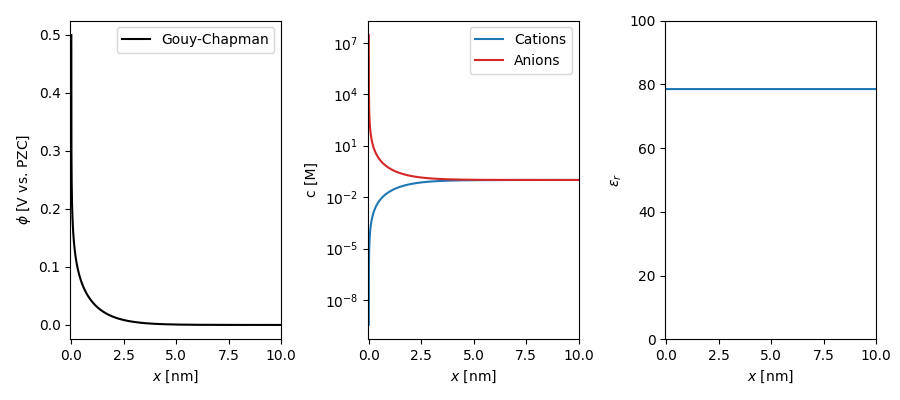

In [3]:
gc = models.GouyChapman(ion_concentration_molar)
gc_sol = gc.solve(x, bc)

fig, ax = plotting.plot_solution(gc_sol, xmin, xmax)
plt.show()

## Borukhov-Andelman-Orland
Ion concentration is limited to its maximum value at the electrode.

Solved in 1 iterations, number of nodes 1000. 
Maximum relative residual: 2.26e-04 
Maximum boundary residual: 9.78e-63
ODE problem solved and saved under ./solutions/Borukhov\sol_Borukhov_c0_0.1000M__xmax_100nm__bc_Dirichlet_0.500V.pkl.


<IPython.core.display.Javascript object>


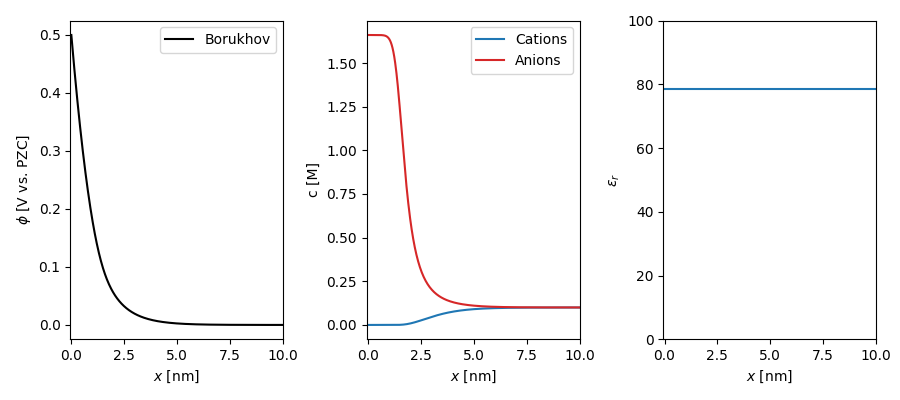

In [4]:
bao = models.Borukhov(ion_concentration_molar, ion_diameter_m)
bao_sol = bao.solve(x, bc)

fig, ax = plotting.plot_solution(bao_sol, xmin, xmax, logscale=False)
plt.show()

## Abrashkin-Andelman-Orland
A Stern layer emerges if the dipole energy is more negative (large dipole moment and large electric field) than the Coulomb energy of ions directly at the electrode.

Solved in 3 iterations, number of nodes 2538. 
Maximum relative residual: 1.11e-05 
Maximum boundary residual: 1.87e-23
ODE problem solved and saved under ./solutions/Abrashkin\sol_Abrashkin_c0_0.1000M__xmax_100nm__bc_Dirichlet_0.500V.pkl.


<IPython.core.display.Javascript object>


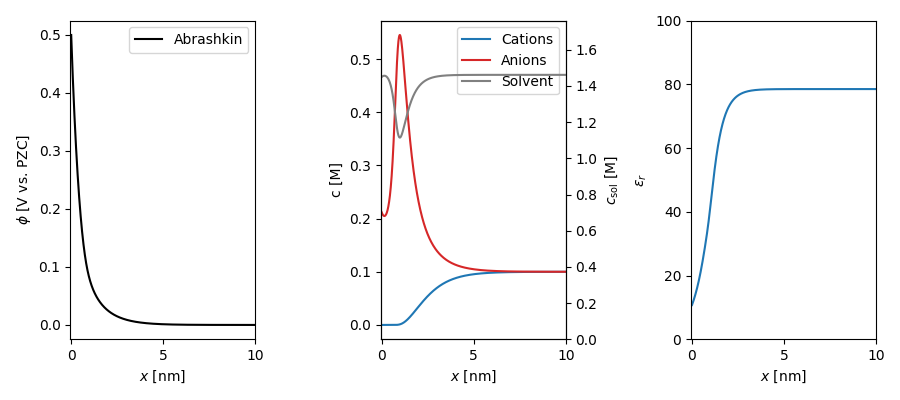

In [5]:
abr = models.Abrashkin(ion_concentration_molar, ion_diameter_m, eps_r_opt=1)
abr_sol = abr.solve(x, bc)

fig, ax = plotting.plot_solution(abr_sol, xmin, xmax, logscale=False, plot_water=True)
plt.show()

## Huang-Chen-Eikerling

Solved in 3 iterations, number of nodes 3043. 
Maximum relative residual: 5.19e-04 
Maximum boundary residual: 7.53e-24
ODE problem solved and saved under ./solutions/Huang\sol_Huang_c0_0.1000M__xmax_100nm__bc_Dirichlet_0.500V.pkl.


<IPython.core.display.Javascript object>


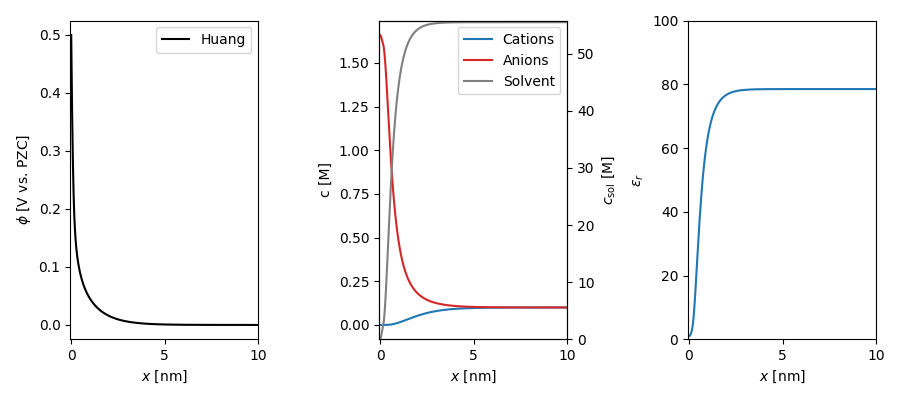

In [6]:
huang = models.Huang(ion_concentration_molar, ion_diameter_m, ion_diameter_m, 2.75e-10, eps_r_opt=1)
huang_sol = huang.solve(x, bc)

fig, ax = plotting.plot_solution(huang_sol, xmin, xmax, logscale=False, plot_water=True)
plt.show()

Should equal Abrashkin for equal ion and solvent molecule sizes, but doesn't... Perhaps an issue with configuration counting (entropy)

Solved in 3 iterations, number of nodes 3072. 
Maximum relative residual: 6.67e-05 
Maximum boundary residual: 2.00e-23
ODE problem solved and saved under ./solutions/Huang\sol_Huang_c0_0.1000M__xmax_100nm__bc_Dirichlet_0.500V.pkl.


<IPython.core.display.Javascript object>


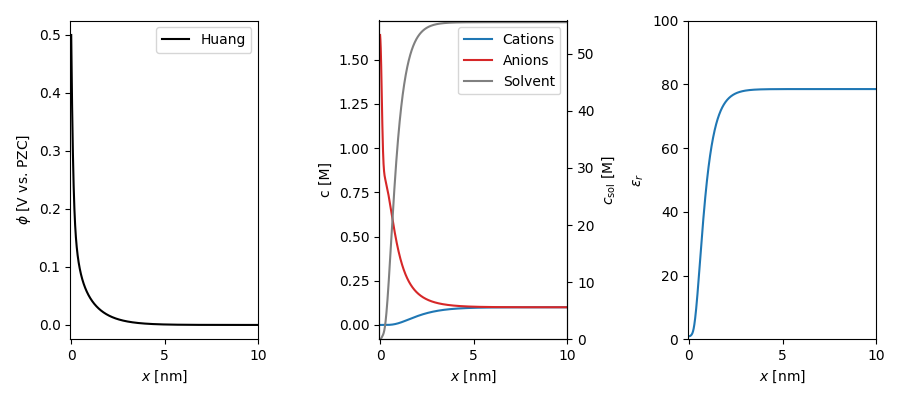

In [7]:
huang = models.Huang(ion_concentration_molar, ion_diameter_m, ion_diameter_m, ion_diameter_m, eps_r_opt=1)
huang_sol = huang.solve(x, bc)

fig, ax = plotting.plot_solution(huang_sol, xmin, xmax, logscale=False, plot_water=True)
plt.show()

## Huang simplified

Solved in 3 iterations, number of nodes 3086. 
Maximum relative residual: 2.52e-04 
Maximum boundary residual: 2.94e-21
ODE problem solved and saved under ./solutions/HuangSimple\sol_HuangSimple_c0_0.1000M__xmax_100nm__bc_Dirichlet_0.500V.pkl.


<IPython.core.display.Javascript object>


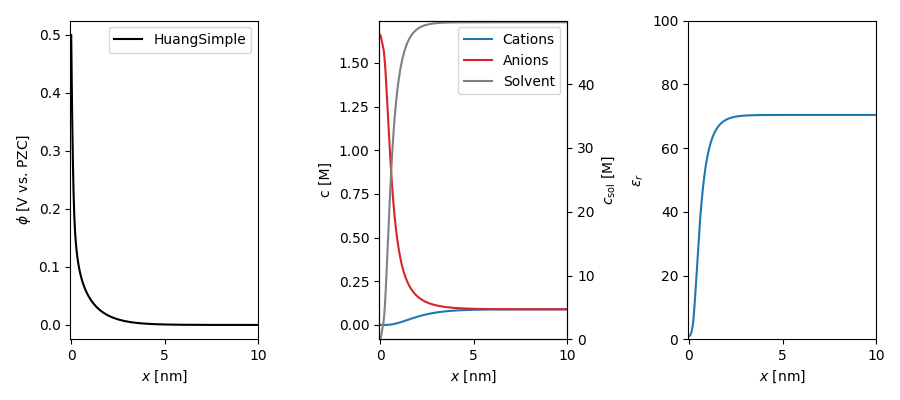

In [8]:
simple = models.HuangSimple(ion_concentration_molar, ion_diameter_m, ion_diameter_m, eps_r_opt=1)
simple_sol = simple.solve(x, bc)

fig, ax = plotting.plot_solution(simple_sol, xmin, xmax, logscale=False, plot_water=True)
plt.show()